In [ ]:
!pip install dash
import pandas as pd
import plotly.express as px
from dash import Dash,dcc, html, Input, Output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.6 MB/s eta 0:00:00


In [7]:
from google.colab import files
uploaded = files.upload()

Saving index.csv to index.csv


In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display


In [8]:
# Load dataset
data = pd.read_csv("index.csv")

In [9]:
# Convert date fields to datetime
data["date"] = pd.to_datetime(data["date"])
data["datetime"] = pd.to_datetime(data["datetime"])


In [10]:
# Add useful time-based features
data["month"] = data["date"].dt.strftime("%Y-%m")
data["day_name"] = data["date"].dt.day_name()
data["hour"] = data["datetime"].dt.hour


In [11]:
# Define a coffee color palette
coffee_colors = ["#4B3832", "#854442", "#FFF4E6", "#BE9B7B", "#3C2F2F", "#D9B382"]


/tmp/ipython-input-1915682757.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="coffee_name", y="money", data=data, estimator=sum, ci=None, palette=coffee_colors)
/tmp/ipython-input-1915682757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coffee_name", y="money", data=data, estimator=sum, ci=None, palette=coffee_colors)
/tmp/ipython-input-1915682757.py:3: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="coffee_name", y="money", data=data, estimator=sum, ci=None, palette=coffee_colors)


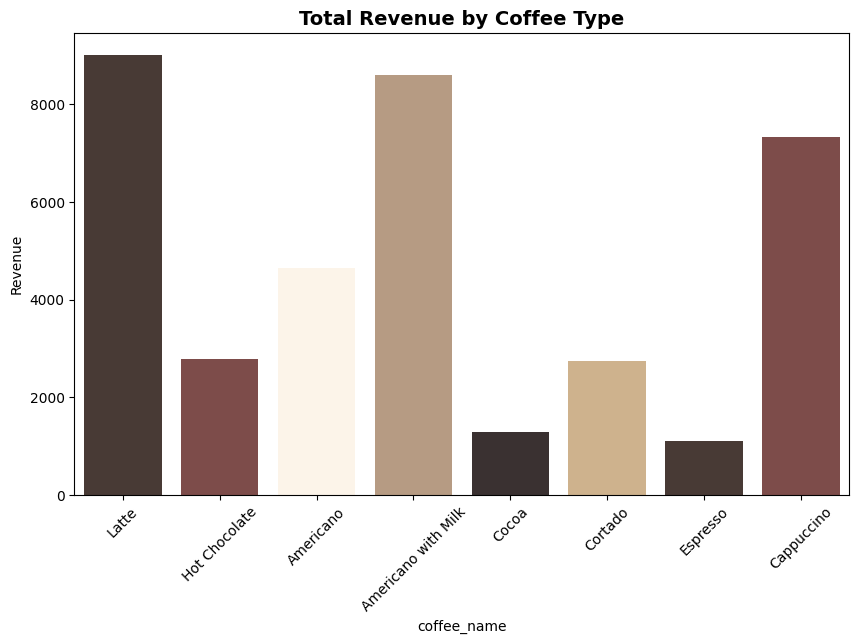

In [12]:
# 1. Bar Graph – Revenue per Coffee Type
plt.figure(figsize=(10,6))
sns.barplot(x="coffee_name", y="money", data=data, estimator=sum, ci=None, palette=coffee_colors)
plt.title("Total Revenue by Coffee Type", fontsize=14, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()

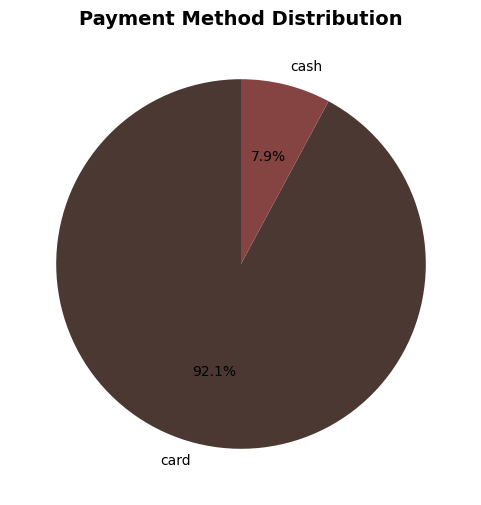

In [13]:
# 2. Pie Chart – Payment Methods
payment_counts = data["cash_type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=90, colors=coffee_colors[:len(payment_counts)])
plt.title("Payment Method Distribution", fontsize=14, weight="bold")
plt.show()


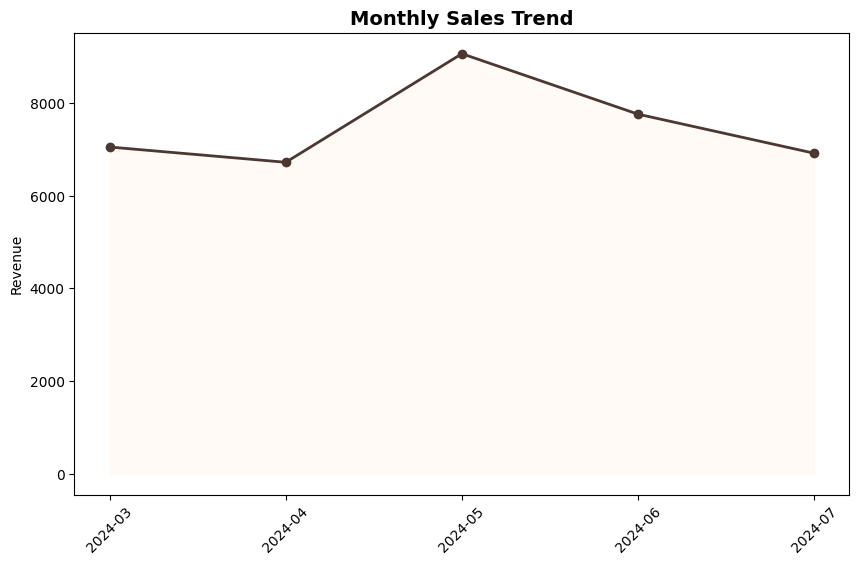

In [14]:
# 3. Line Graph – Monthly Sales Trend
monthly_sales = data.groupby("month")["money"].sum()
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", linestyle="-", color=coffee_colors[0], linewidth=2)
plt.fill_between(monthly_sales.index, monthly_sales.values, color=coffee_colors[2], alpha=0.4)
plt.title("Monthly Sales Trend", fontsize=14, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()


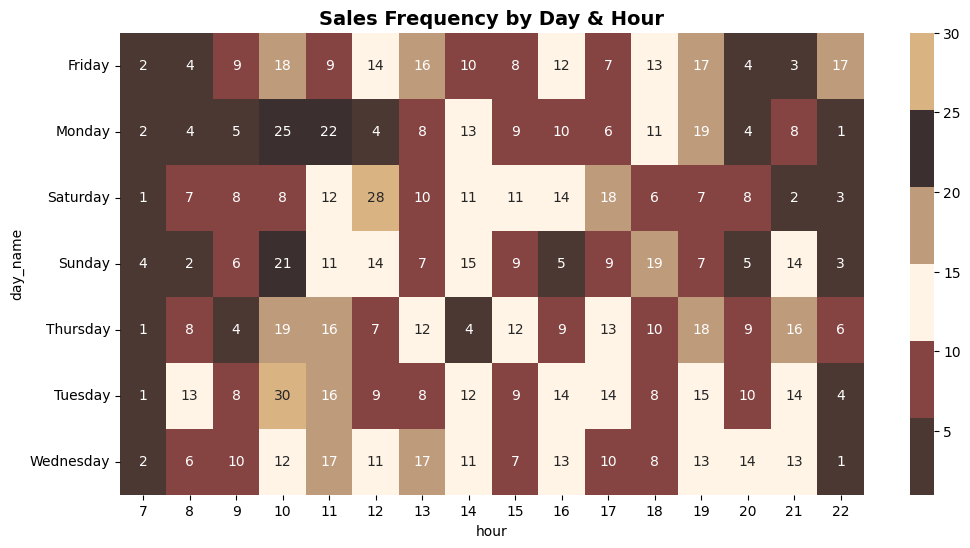

In [15]:
# 4. Heatmap – Sales Frequency by Day and Hour
pivot_table = data.groupby(["day_name","hour"]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap=sns.color_palette(coffee_colors, as_cmap=True), annot=True, fmt="d")
plt.title("Sales Frequency by Day & Hour", fontsize=14, weight="bold")
plt.show()

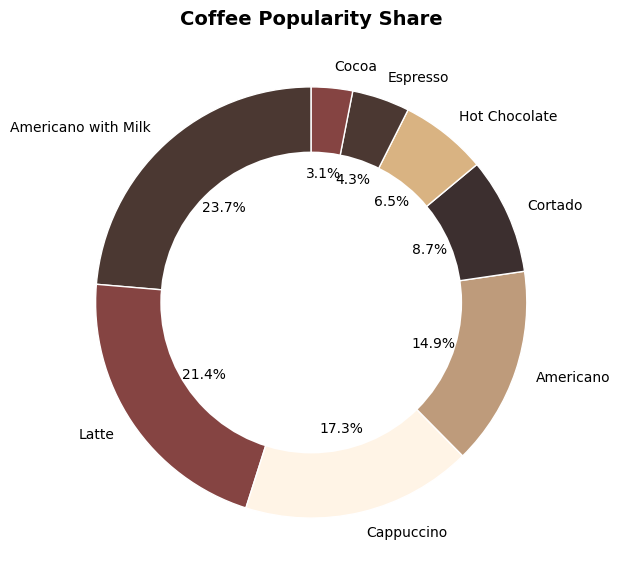

In [16]:
# 5. Donut Chart – Coffee Popularity
coffee_counts = data["coffee_name"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(coffee_counts, labels=coffee_counts.index, autopct="%1.1f%%", startangle=90, colors=coffee_colors, wedgeprops={'edgecolor':'white'})
# Add donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Coffee Popularity Share", fontsize=14, weight="bold")
plt.show()

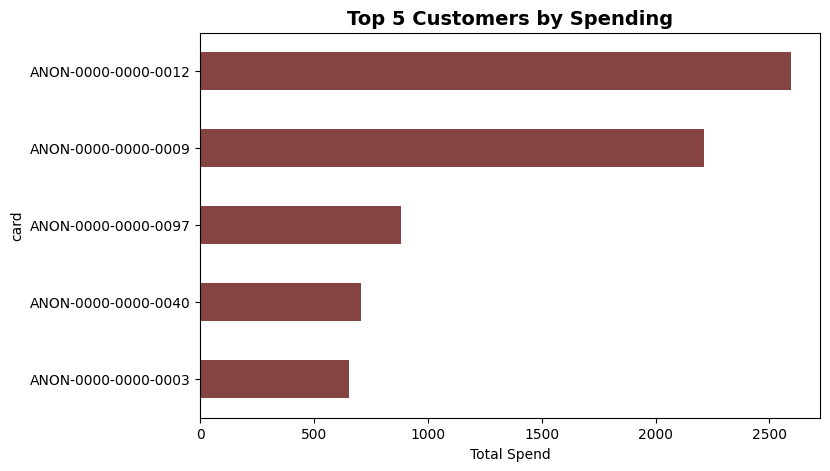

In [17]:
# 6. Horizontal Bar – Top Customers
top_customers = data.groupby("card")["money"].sum().nlargest(5)
plt.figure(figsize=(8,5))
top_customers.sort_values().plot(kind="barh", color=coffee_colors[1])
plt.title("Top 5 Customers by Spending", fontsize=14, weight="bold")
plt.xlabel("Total Spend")
plt.show()